# Convnet trained on both whitenoise and natural scenes for all cells in 15-10-07 experiment

In [1]:
import numpy as np
from os.path import expanduser
import os
import json
import theano
import tableprint
import pyret.filtertools as ft
import pyret.visualizations as pyviz
from keras.models import model_from_json
import h5py
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%matplotlib inline
#%matplotlib qt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled)
/home/lane/ssd/code/theano/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [11]:
# deep retina imports
import deepretina.visualizations as viz
from deepretina.preprocessing import datagen, loadexpt
from deepretina.modeltools import load_model, load_partial_model, list_layers, get_performance, get_weights, get_test_responses
from deepretina.metrics import *

## Load model

In [3]:
model_path = os.path.expanduser('~/data/deep-retina/saved/lenna.salamander/2016-01-26 10.35.16 convnet/')
weight_name = 'epoch029_iter04250_weights.h5'

In [4]:
mdl = load_model(model_path, weight_name)

In [5]:
list_layers(model_path, weight_name)

+-----------+------------+-----------+
+-----------+------------+-----------+
|layer      | weights    | biases    |
+-----------+------------+-----------+
+-----------+------------+-----------+
|   layer_0 |    param_0 |    param_1|
|   layer_1 |            |           |
|   layer_2 |            |           |
|   layer_3 |            |           |
|   layer_4 |    param_0 |    param_1|
|   layer_5 |            |           |
|   layer_6 |    param_0 |    param_1|
+-----------+------------+-----------+


In [6]:
true_white, predicted_white = get_test_responses(mdl, stim_type='white', cells=[0,1,2,3,4])
true_natural, predicted_natural = get_test_responses(mdl, stim_type='natural', cells=[0,1,2,3,4])

Loading testing data... Done.
Loading testing data... Done.


In [8]:
(true_white.shape, predicted_white.shape)

((5950, 5), (5950, 5))

## whitenoise

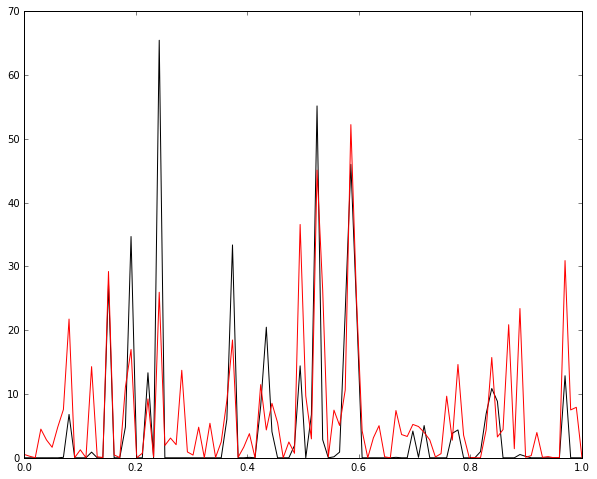

In [9]:
plt.plot(np.linspace(0, 100*.01, 100), true_white[:100, 0], 'k')
plt.plot(np.linspace(0, 100*.01, 100), predicted_white[:100, 0], 'r')

## naturalscene

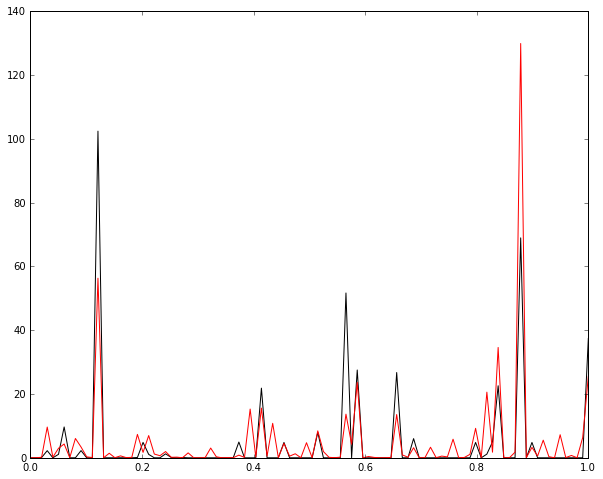

In [10]:
plt.plot(np.linspace(0, 100*.01, 100), true_natural[:100, 0], 'k')
plt.plot(np.linspace(0, 100*.01, 100), predicted_natural[:100, 0], 'r')

# Quantitative performance  

This model is in some cases a better predictor of the average PSTH than the cells' held-out repeat

In [12]:
cc_multi = multicell(cc)
lli_multi = multicell(lli)
rmse_multi = multicell(rmse)
fev_multi = multicell(fev)

### whitenoise

In [14]:
average_cc_white, all_ccs_white = cc_multi(true_white, predicted_white)
print(average_cc_white)
print(all_ccs_white)

0.681995736097
[0.7479431977760399, 0.63429757978041479, 0.63824751175471206, 0.76600922999485244, 0.62348116117826491]


### naturalscene

In [15]:
average_cc_natural, all_ccs_natural = cc_multi(true_natural, predicted_natural)
print(average_cc_natural)
print(all_ccs_natural)

0.569298479949
[0.63840606219644536, 0.48230207849836154, 0.47858010627333036, 0.61920902065292027, 0.62799513212546765]


# Visualize model

#### Conv layer

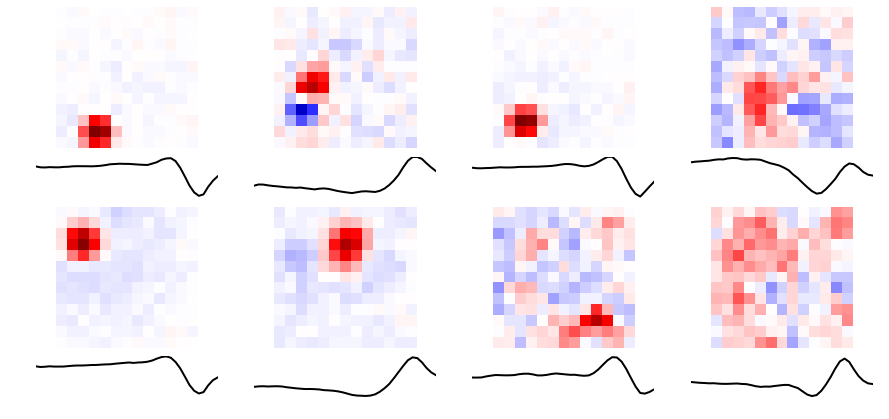

In [16]:
viz.visualize_convnet_weights(model_path + weight_name, normalize=True, fig_size=(15,7))

#### Affine layer

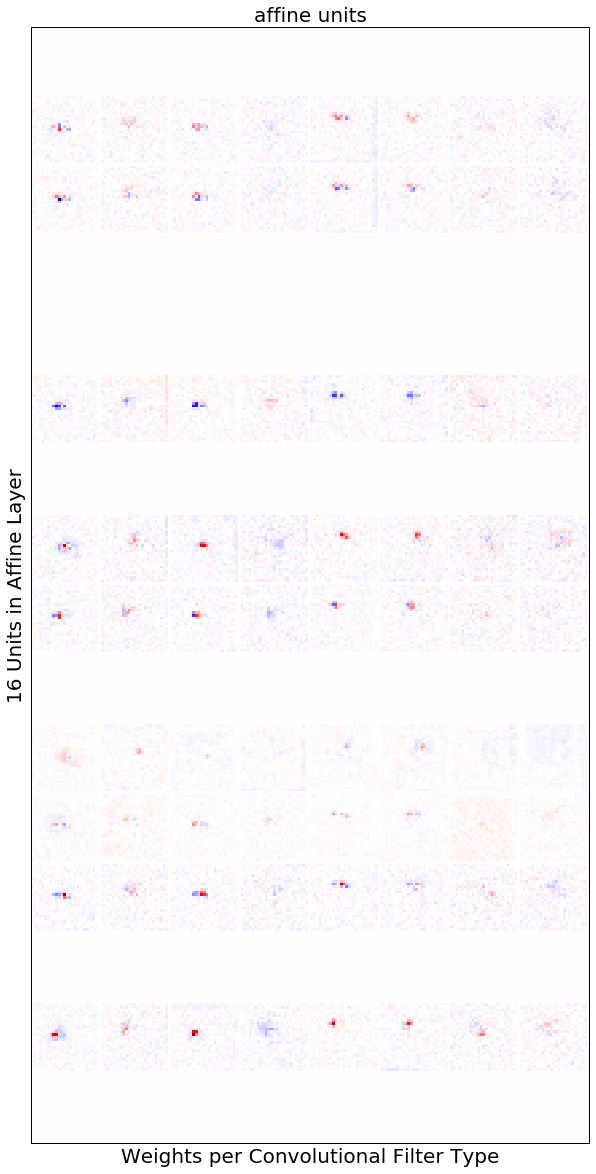

In [17]:
viz.visualize_affine_weights(model_path + weight_name, 8, fig_size=(20,20), layer_name='layer_4')

## What do the STAs of these affine inter-units?

In [18]:
sta = viz.get_sta(mdl, 4)

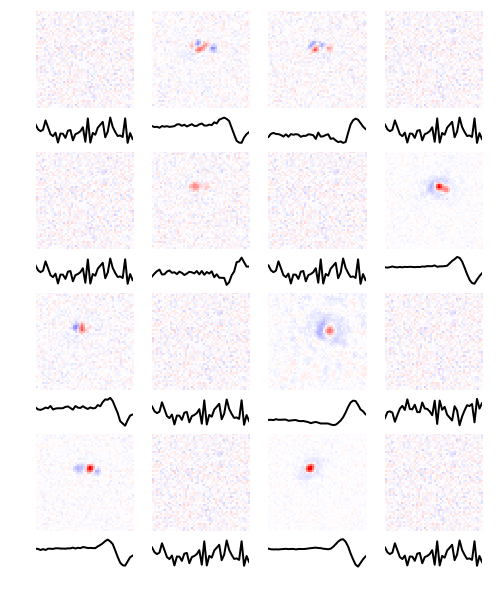

In [19]:
viz.visualize_sta(sta, normalize=True)

## STAs of the final cell outputs?

In [20]:
final_stas = viz.get_sta(mdl, 6)

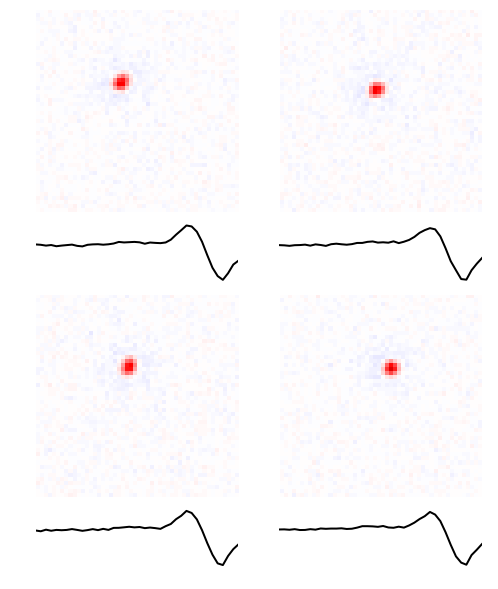

In [21]:
viz.visualize_sta(final_stas, normalize=True)

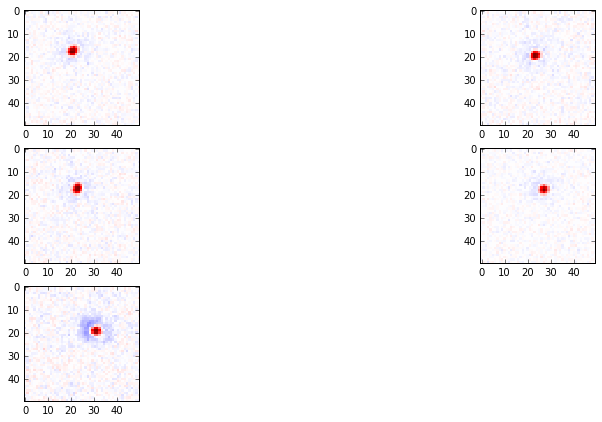

In [24]:
fig = plt.gcf()
fig.set_size_inches((15,7))
for i in range(final_stas.shape[0]):
    space, time = ft.decompose(final_stas[i])
    plt.subplot(3,2,i+1)
    plt.imshow(space, cmap='seismic', clim=[-np.max(abs(space)), np.max(abs(space))])

# Response to Structured stimuli

In [42]:
from deepretina.structured_stimuli import *

In [28]:
probe_adaptation = get_contrast_changes(period=1, sample_rate=100)

In [29]:
probe_adaptation.shape

(260, 40, 50, 50)

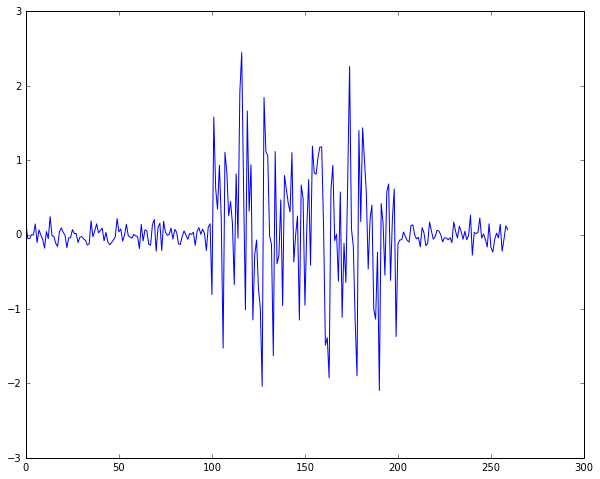

In [30]:
plt.plot(probe_adaptation[:,0,0,0])

In [31]:
responses = []
for i in range(10000):
    probe_adaptation = get_contrast_changes(period=1, sample_rate=100)
    response = mdl.predict(probe_adaptation)
    responses.append(response)
    if i % 100 == 0:
        print('Iteration %i of %i' %(i,10000))

Iteration 0 of 10000
Iteration 100 of 10000
Iteration 200 of 10000
Iteration 300 of 10000
Iteration 400 of 10000
Iteration 500 of 10000
Iteration 600 of 10000
Iteration 700 of 10000
Iteration 800 of 10000
Iteration 900 of 10000
Iteration 1000 of 10000
Iteration 1100 of 10000
Iteration 1200 of 10000
Iteration 1300 of 10000
Iteration 1400 of 10000
Iteration 1500 of 10000
Iteration 1600 of 10000
Iteration 1700 of 10000
Iteration 1800 of 10000
Iteration 1900 of 10000
Iteration 2000 of 10000
Iteration 2100 of 10000
Iteration 2200 of 10000
Iteration 2300 of 10000
Iteration 2400 of 10000
Iteration 2500 of 10000
Iteration 2600 of 10000
Iteration 2700 of 10000
Iteration 2800 of 10000
Iteration 2900 of 10000
Iteration 3000 of 10000
Iteration 3100 of 10000
Iteration 3200 of 10000
Iteration 3300 of 10000
Iteration 3400 of 10000
Iteration 3500 of 10000
Iteration 3600 of 10000
Iteration 3700 of 10000
Iteration 3800 of 10000
Iteration 3900 of 10000
Iteration 4000 of 10000
Iteration 4100 of 10000
Iter

In [ ]:
# responses = []
# for i in range(10000):
#     probe = []
#     for j in range(20):
#         probe.append(get_contrast_changes(period=1, sample_rate=100))
#     probes = np.vstack(probe)
#     response = mdl.predict(probes)
#     response_stacked = response.reshape((20,260,5))
#     responses.append(response_stacked)
#     if i % 1000 == 0:
#         print('Iteration %i of %i' %(i,10000))

In [36]:
all_responses = np.hstack(responses)
all_responses.shape

(260, 50000)

In [49]:
average_responses = np.mean(all_responses, 1)
average_responses.shape

(260,)

In [41]:
flicker.shape

(260, 40, 50, 50)

In [46]:
flicker.shape

(300, 50, 50)

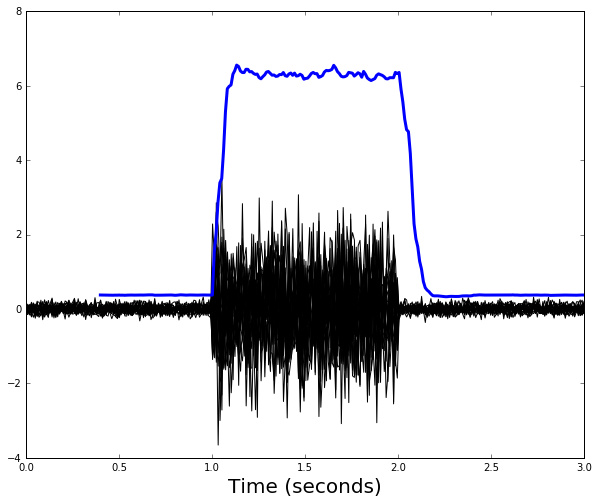

In [50]:
# Plot multiple flicker sequences
for i in range(20):
    flicker = get_contrast_changes(period=1, sample_rate=100, roll=False)
    plt.plot(np.linspace(0,3,300), flicker[:,0,0], 'k')

# Plot average CNN and LN responses
plt.plot(np.linspace(0.4,3,260), average_responses, 'b', linewidth=3)
#plt.plot(np.linspace(0.4,3,260), average_ln_response, 'r', linewidth=3)
plt.xlabel('Time (seconds)', fontsize=20)
#plt.title('RED: LN Responses, BLUE: CNN Responses', fontsize=20)
#plt.savefig('Contrast Adaptation - natural scenes LN model.png', dpi=500)

# Look at just one cell

In [51]:
rs = np.array(responses)
rs.shape

(10000, 260, 5)

In [54]:
average_rs = np.mean(rs, axis=0)
average_rs.shape

(260, 5)

In [62]:
import brewer2mpl as mpl
import mpld3

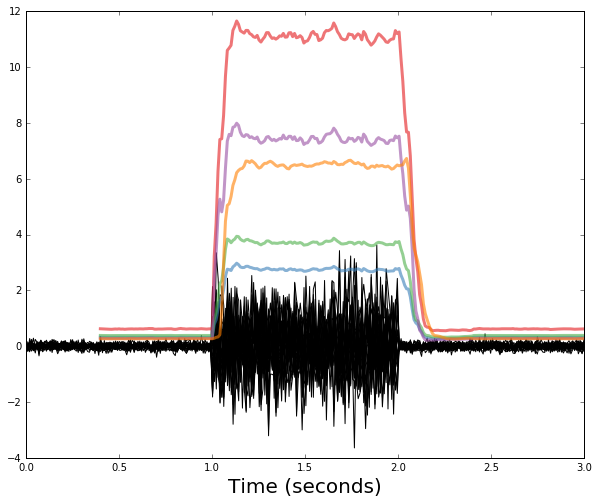

In [66]:
color_map = mpl.get_map('Set1', 'Qualitative', 5)
colors = color_map.mpl_colors

# Plot multiple flicker sequences
for i in range(20):
    flicker = get_contrast_changes(period=1, sample_rate=100, roll=False)
    plt.plot(np.linspace(0,3,300), flicker[:,0,0], 'k')

# Plot average CNN and LN responses
for c in range(average_rs.shape[1]):
    plt.plot(np.linspace(0.4,3,260), average_rs[:,c], color=colors[c], linewidth=3, alpha=0.6)
    #plt.plot(np.linspace(0.4,3,260), average_ln_response, 'r', linewidth=3)
    plt.xlabel('Time (seconds)', fontsize=20)
    #plt.title('RED: LN Responses, BLUE: CNN Responses', fontsize=20)
    #plt.savefig('Contrast Adaptation - natural scenes LN model.png', dpi=500)
# mpld3.display()

In [67]:
from deepretina.preprocessing import loadexpt

In [68]:
data = loadexpt(0, 'naturalscene', 'test', 40)

Loading testing data... Done.


In [71]:
t = np.linspace(0, 0.01*data.y.size, data.y.size)

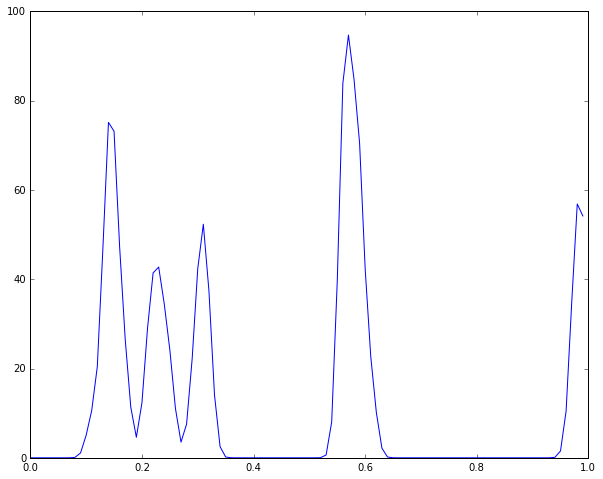

In [73]:
plt.plot(t[:100], data.y[:100])